<a href="https://colab.research.google.com/github/ayushsati19/Internship-Project/blob/main/Analyzing_Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
file_path='/content/Amazon Sales Records (2) - Amazon Sales Records (2).csv'
file_data=pd.read_csv(file_path)

In [ ]:
file_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
file_data.duplicated().sum()

0

In [ ]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Based on our observations, we can confidently state that the dataset appears to be clean and ready for further analysis. Specifically, we did not find any missing or duplicate values in the data, and the data types of the respective columns are appropriate for the data they contain.
But date format is not uniform.So reordering data format.

In [ ]:
from datetime import datetime

def convert_date_string(date_string):
    try:
        return datetime.strptime(date_string, '%m-%d-%Y')
    except ValueError:
        return datetime.strptime(date_string, '%d/%m/%Y')

file_data['order date'] = file_data['Order Date'].apply(convert_date_string)

In [ ]:
from datetime import datetime

def convert_date_string(date_string):
    try:
        return datetime.strptime(date_string, '%m-%d-%Y')
    except ValueError:
        return datetime.strptime(date_string, '%m/%d/%Y')

file_data['ship date'] = file_data['Ship Date'].apply(convert_date_string)

In [ ]:
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order date,ship date
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010-06-27
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012-09-15
341417157,Europe,Russia,Office Supplies,Offline,L,05-02-2014,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014-05-08
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014-07-05
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013-02-06


In [ ]:
# deleting previous order date and shipping date
file_data.drop(columns=['Order Date','Ship Date'],inplace=True)

In [ ]:
# performing EDA
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order date,ship date
Order ID,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010-06-27
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012-09-15
341417157,Europe,Russia,Office Supplies,Offline,L,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014-05-08
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014-07-05
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013-02-06


In [ ]:
file_data.set_index('Order ID',inplace=True)

In [ ]:
file_data.corr(method='pearson')

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


Unit price and unit solds are inversely proportional to each other as unit price increases total unit sold decreases.Same is with unit sold and unit cost.
Unit cost and unit price are strongly correlated which is obvious as unit cost directly impact unit price.


Total revenue depends largely on unit price,unit cost Total cost and Total profit.

<Axes: >

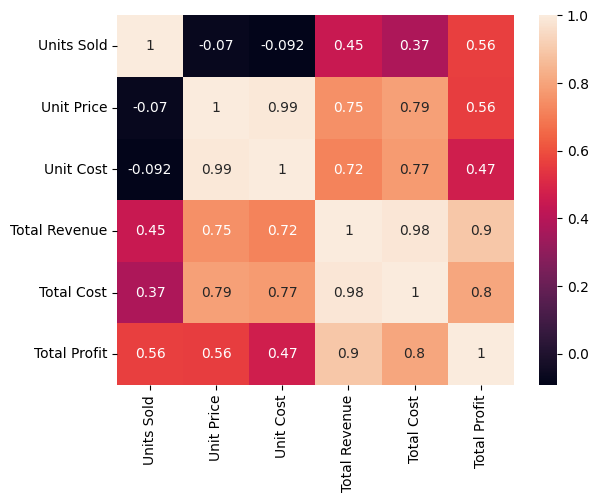

In [ ]:
sns.heatmap(file_data.corr(),annot=True)

In [ ]:
file_data['Country'] = pd.Categorical(file_data['Country'],ordered=True)

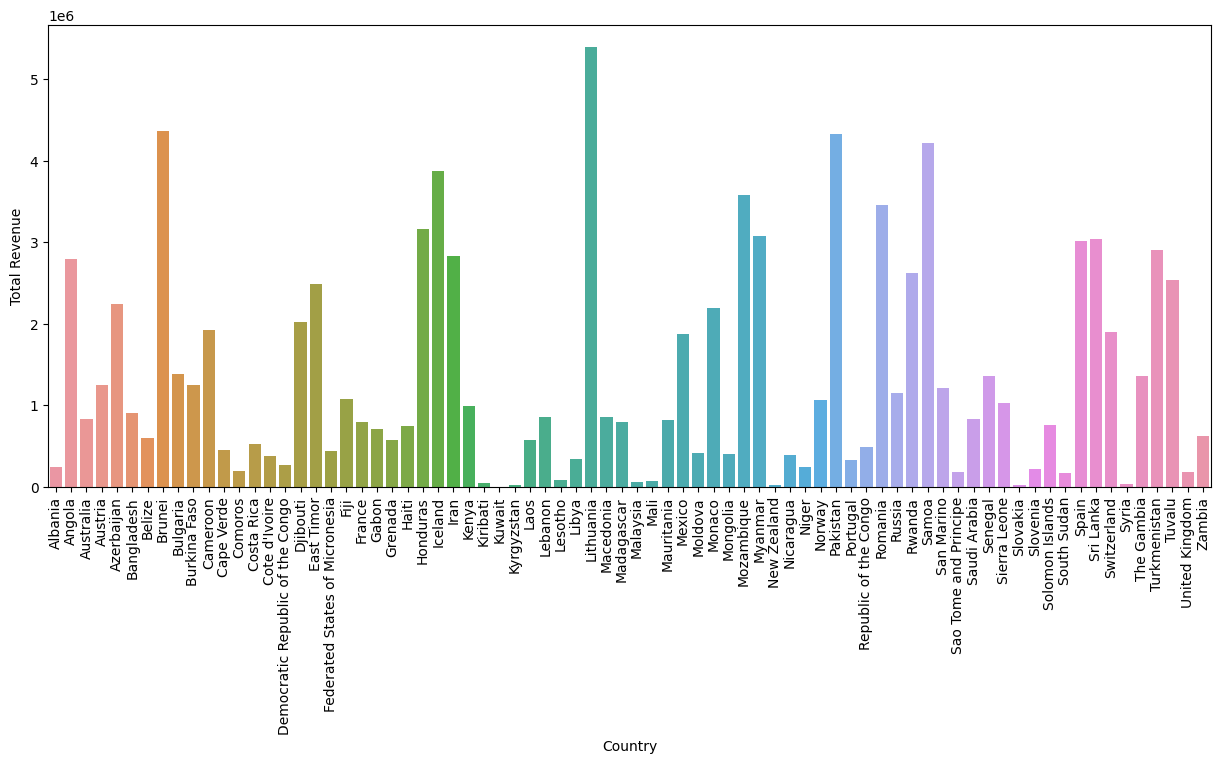

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='Total Revenue', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

Highest Revenue generating country is Lithuania followed by Brunei and Pakistan.

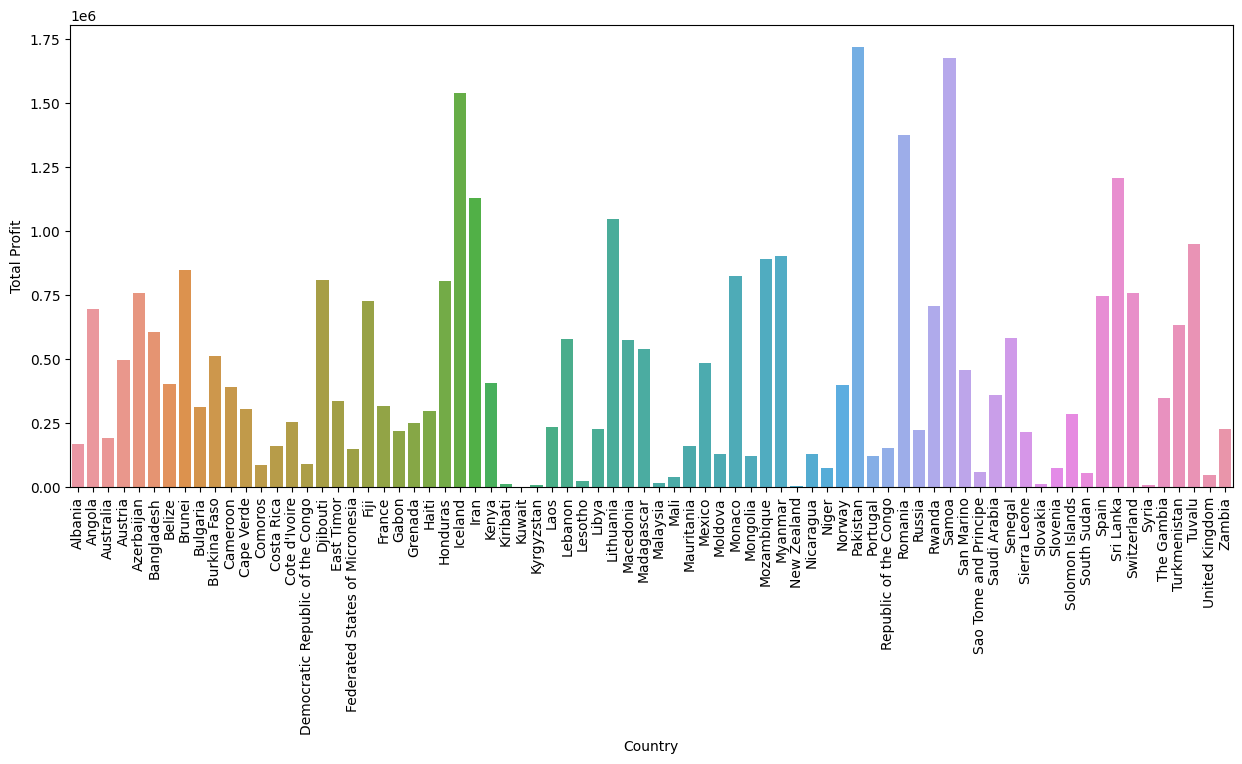

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='Total Profit', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)


In [ ]:
file_data.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order date,ship date
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010-06-27
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012-09-15
341417157,Europe,Russia,Office Supplies,Offline,L,05-02-2014,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014-05-08
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014-07-05
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013-02-06


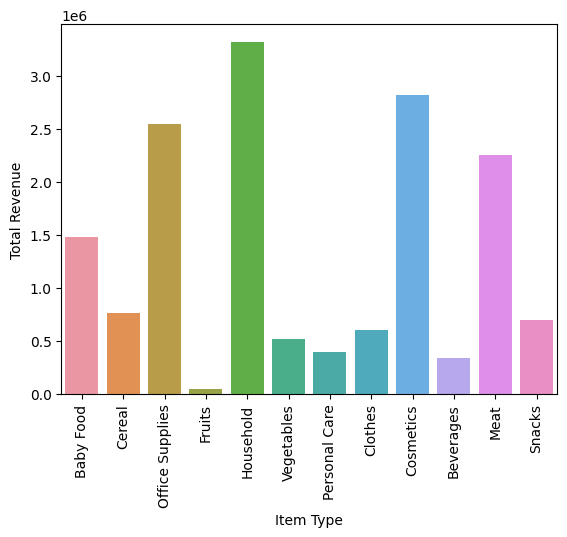

In [ ]:
sns.barplot(x='Item Type', y='Total Revenue', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)


household generated highest revenues followed by cosmetics.

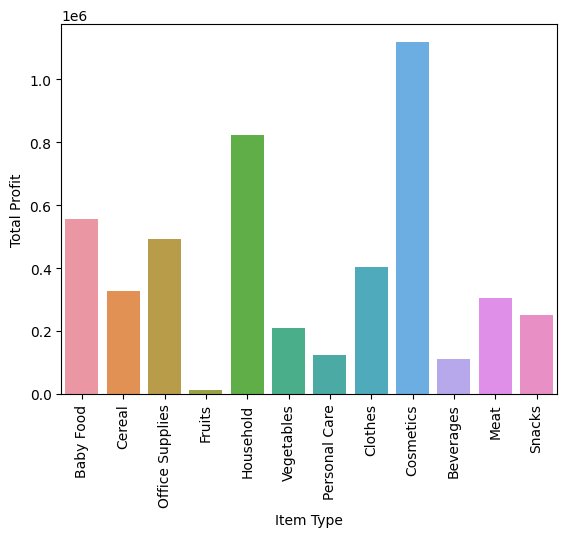

In [ ]:
sns.barplot(x='Item Type', y='Total Profit', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)


Cosmetics were major profit generator followed by households.

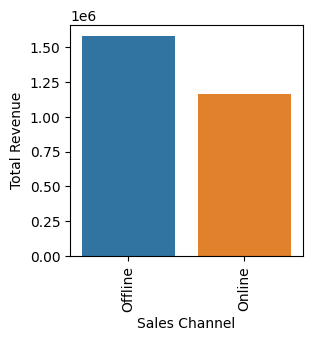

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Sales Channel', y='Total Revenue', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

Majority amount of revenue was generated thorugh offline channel.

In [ ]:
file_data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

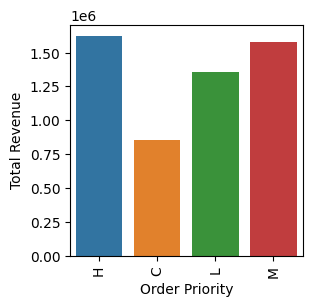

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Order Priority', y='Total Revenue', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

items with order priority 'H' generated highest revenue followed by 'M'

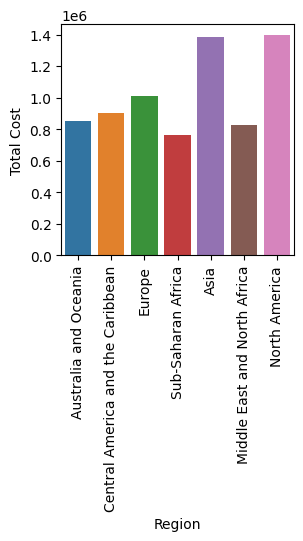

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Region', y='Total Cost', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

 Costs of products is highest in Asia and North American region and minimum in Middle East and North African and Sub Saharan Region. Products are more expansive in Asia and North American region.

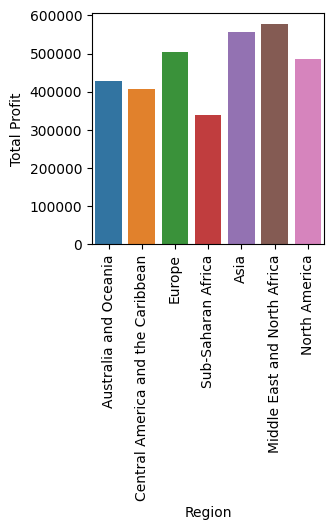

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='Region', y='Total Profit', data=file_data, errorbar=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

Middle East and North Africa region generates highest profit.Total cost of products is less in these region so that may be the reason of profit.Sub Saharan region generates lowest profit.

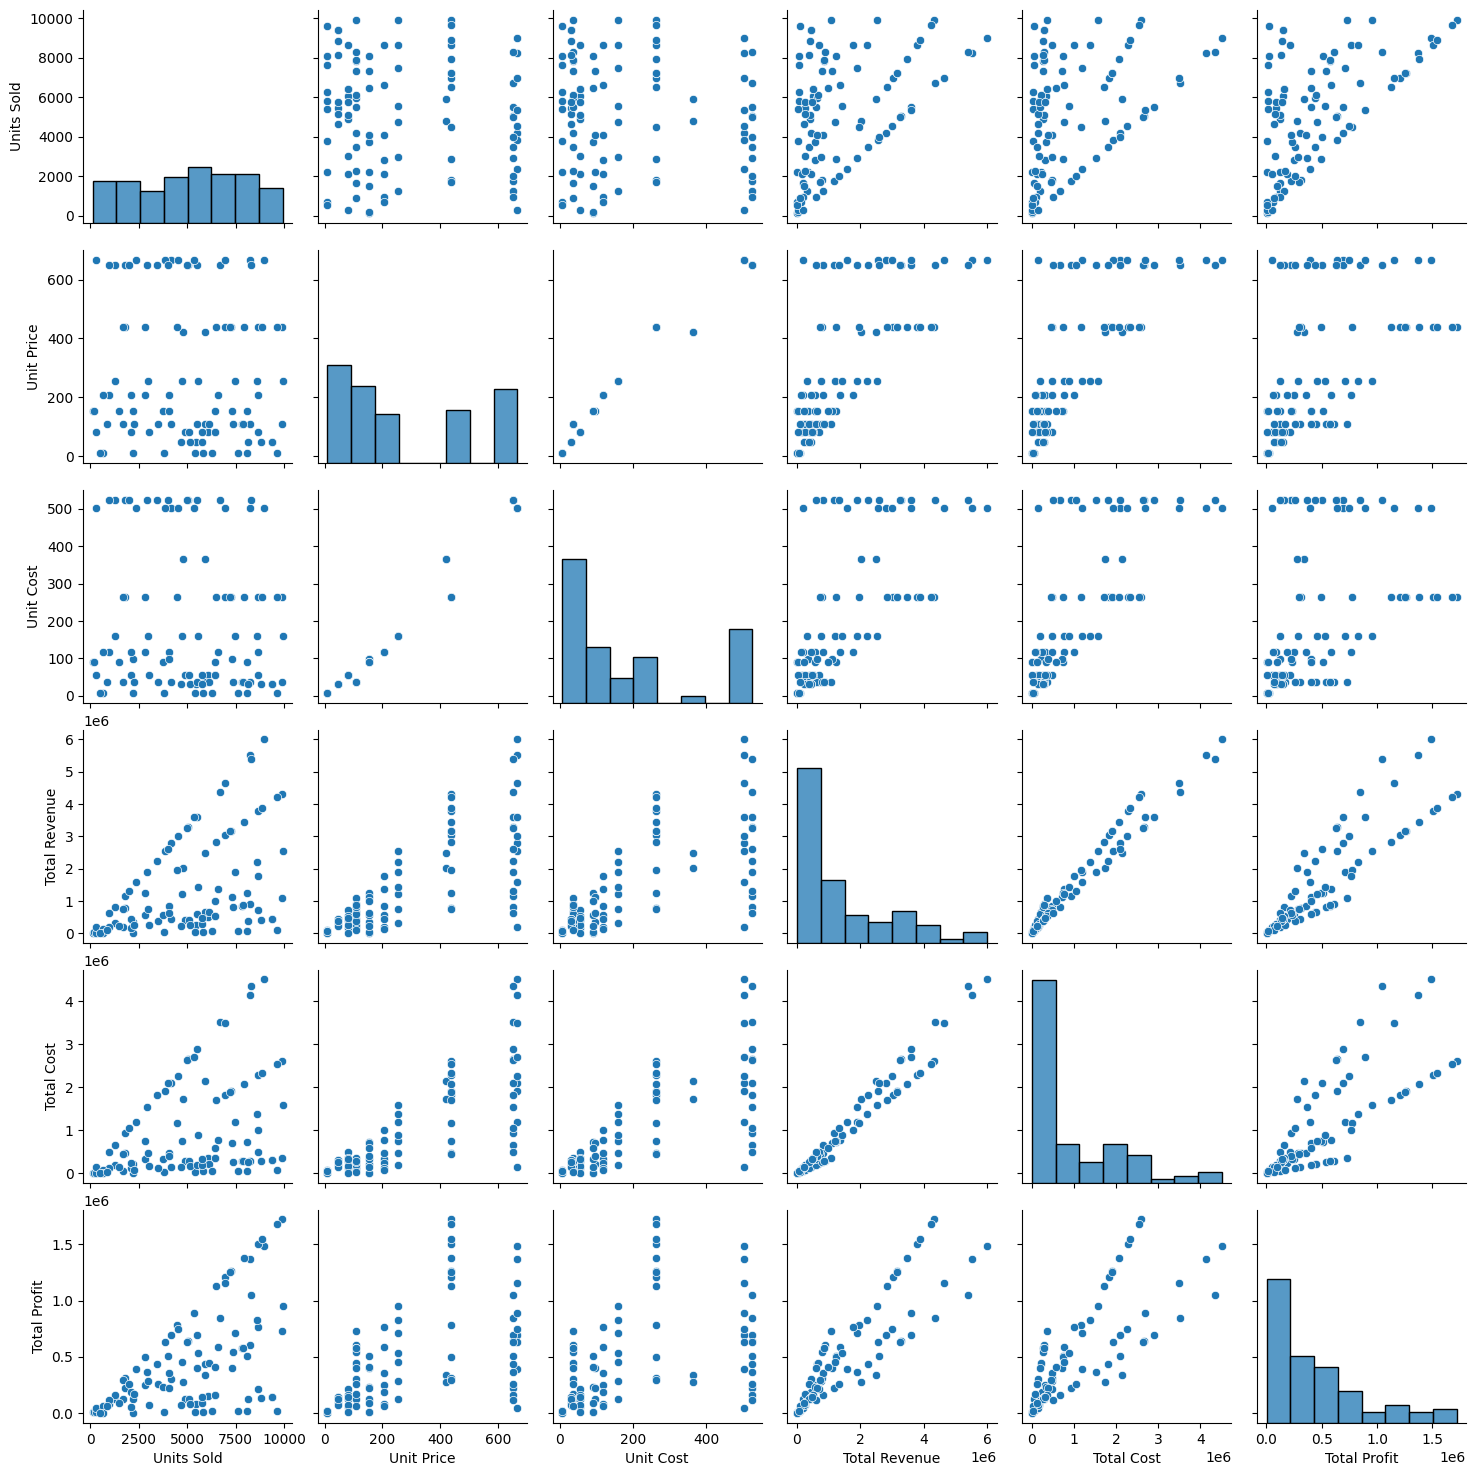

In [ ]:
sns.pairplot(data=file_data)

In [ ]:
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order date,ship date
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010-06-27
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012-09-15
341417157,Europe,Russia,Office Supplies,Offline,L,05-02-2014,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014-05-08
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014-07-05
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013-02-06


<Axes: xlabel='Order Priority', ylabel='Total Cost'>

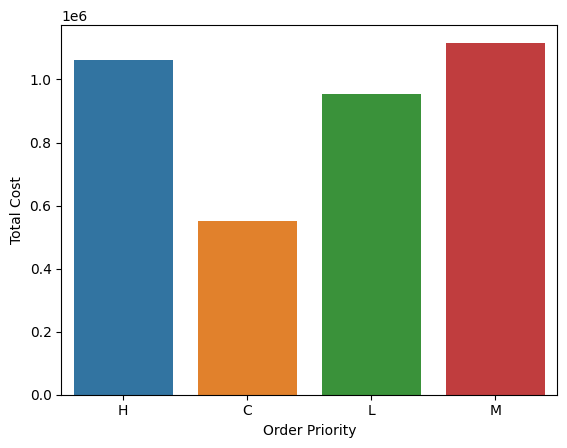

In [ ]:
sns.barplot(data=file_data,x='Order Priority',y='Total Cost',errorbar=None)

Cost associated with items having order priority M is highest.

<Axes: xlabel='Order Priority', ylabel='Total Revenue'>

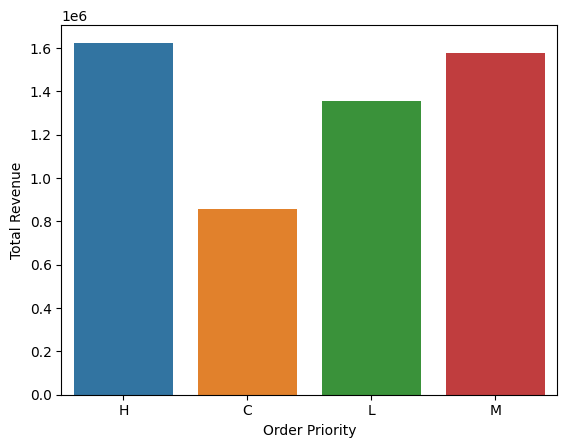

In [ ]:
sns.barplot(data=file_data,x='Order Priority',y='Total Revenue',errorbar=None)

But order with priority H generate highest revenue.

<Axes: xlabel='Order Priority', ylabel='Total Profit'>

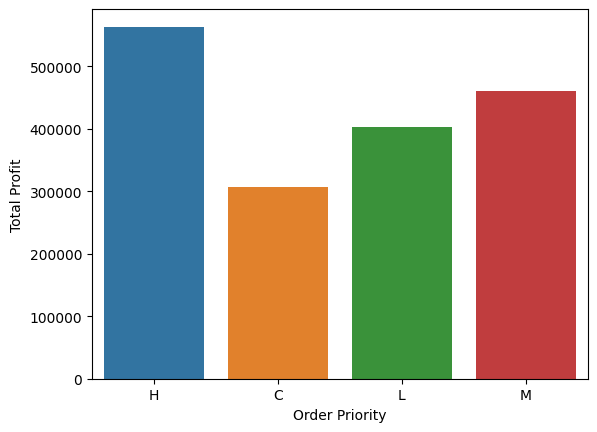

In [ ]:
sns.barplot(data=file_data,x='Order Priority',y='Total Profit',errorbar=None)

Also the orders with priority H generate highest profit.

,Total Profit,Ship Date
Order ID,,
669165933,951410.50,6/27/2010
963881480,248406.36,9/15/2012
341417157,224598.75,05-08-2014
514321792,19525.82,07-05-2014
115456712,639077.50,02-06-2013
...,...,...
512878119,65214.72,09-03-2011
810711038,15103.47,12/28/2011
728815257,93748.05,6/29/2016


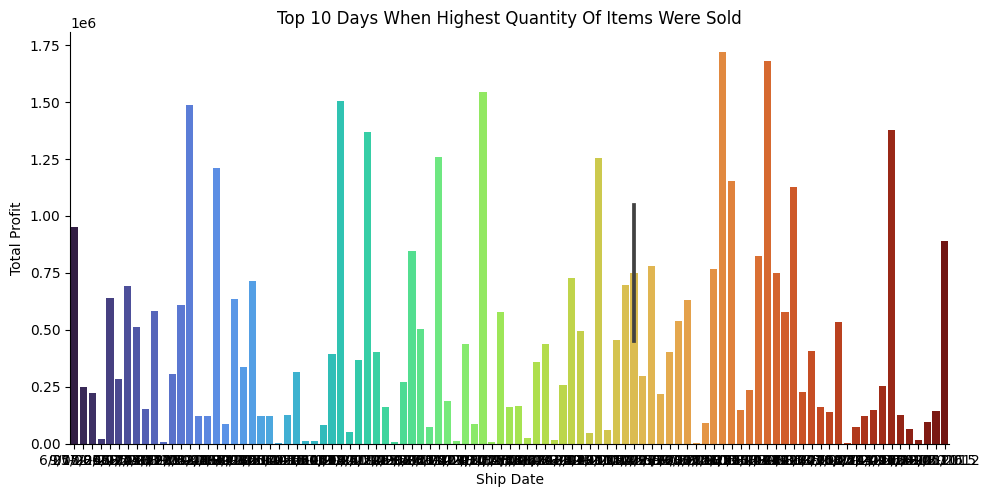

In [ ]:
sns.catplot(y = 'Total Profit', x = 'Ship Date', data = file_data, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Highest Quantity Of Items Were Sold')
file_data[['Total Profit','Ship Date']]

In [ ]:
file_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order date,ship date
Order ID,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28,2010-06-27
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22,2012-09-15
341417157,Europe,Russia,Office Supplies,Offline,L,05-02-2014,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02,2014-05-08
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20,2014-07-05
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01,2013-02-06


In [ ]:
# Extract year from Date column
file_data['Order Year'] =file_data['order date'].dt.year

<Axes: xlabel='Order Year', ylabel='Total Revenue'>

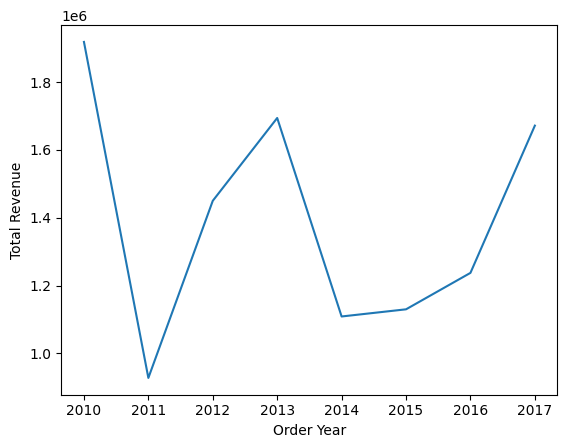

In [ ]:
sns.lineplot(data=file_data,x='Order Year',y="Total Revenue",errorbar=None)

<Axes: xlabel='Order Year', ylabel='Total Profit'>

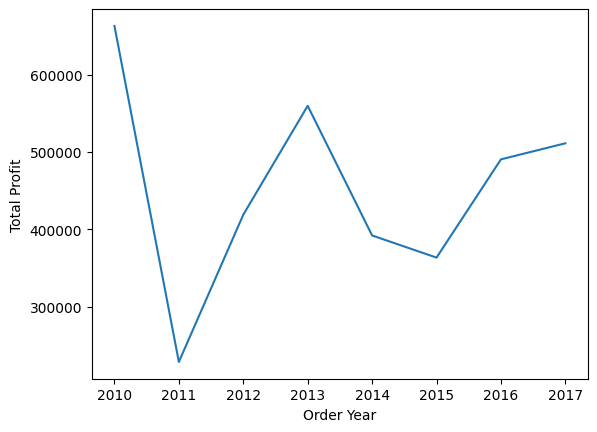

In [ ]:
sns.lineplot(data=file_data,x='Order Year',y="Total Profit",errorbar=None)

In [ ]:
# Extract month from Date column
file_data['Order Month'] =file_data['order date'].dt.month

<Axes: xlabel='Order Month', ylabel='Total Revenue'>

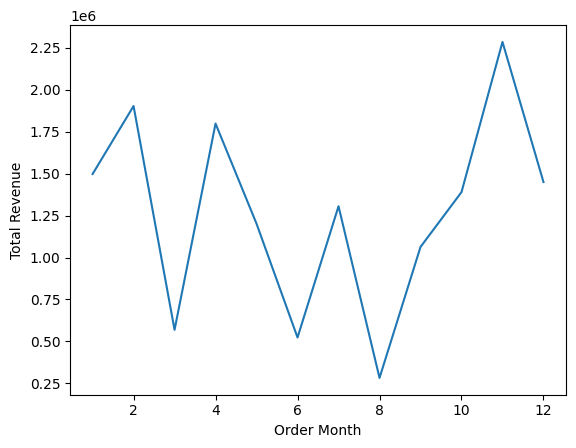

In [ ]:
sns.lineplot(data=file_data,x='Order Month',y="Total Revenue",errorbar=None)

Total Revenue is highest in November and lowesst in August.

<Axes: xlabel='Order Month', ylabel='Total Profit'>

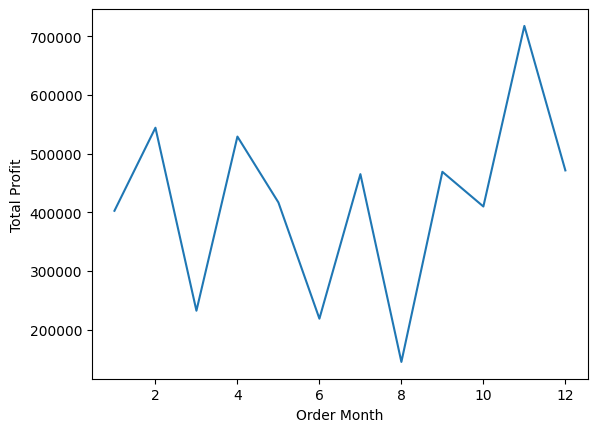

In [ ]:
sns.lineplot(data=file_data,x='Order Month',y="Total Profit",errorbar=None)